<a href="https://colab.research.google.com/github/sunwoo7441/class2025Spring/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords

text="I know one thing for certain: don't settle for less than what you're capable of, but strive for something bigger. Some of you reading this might identify with this message because it resonates with you on a deeper level. For others, at the end of their tether the message might be nothing more than a trivial pep talk. What I wish to convey irrespective of where you are in your journey is: NEVER settle for less. If you settle for less, you will receive less than you deserve and convince yourself you are justified to receive it. If you have not achieved the success you deserve and are considering giving up, will you regret it in a few years or decades from now? Only you can answer that, but you should carve out time to discover your motivation for pursuing your goals. It’s a fact, if you don’t know what you want you’ll get what life hands you and it may not be in your best interest, affirms author Larry Weidel: “Winners know that if you don’t figure out what you want, you’ll get whatever life hands you.” The key is to develop a powerful vision of what you want and hold that image in your mind. Nurture it daily and give it life by taking purposeful action towards it."
sentences = sent_tokenize(text) # NLTK 함수
total_documents = len(sentences)
print(total_documents)

9


In [ ]:
def _create_frequency_matrix(sentences):
    """
    문장 리스트를 입력받아 단어 빈도 행렬을 생성하는 함수입니다.

    Args:
        sentences (list): 문장 리스트

    Returns:
        dict: 단어 빈도 행렬 (key: 문장[:15], value: 단어 빈도표)
    """
    frequency_matrix = {}  # 단어 빈도 행렬을 저장할 딕셔너리를 초기화
    stopWords = set(stopwords.words("english"))  # 영어 불용어 목록을 가져와서 set 자료형으로 변환
    ps = PorterStemmer()  # PorterStemmer 객체를 생성

    for sent in sentences:  # 입력된 문장 리스트에서 각 문장에 대해 반복
        freq_table = {}  # 현재 문장의 단어 빈도를 저장할 딕셔너리를 초기화
        words = word_tokenize(sent)  # 문장을 단어 단위로 분리

        for word in words:  # 분리된 단어 리스트에서 각 단어에 대해 반복
            word = word.lower()  # 단어를 소문자로 변환
            word = ps.stem(word)  # PorterStemmer를 사용하여 단어의 어간을 추출
            if word in stopWords:  # 만약 단어가 불용어라면 건너뜀
                continue

            if word in freq_table:  # 만약 단어가 이미 freq_table에 있다면 빈도를 1 증가
                freq_table[word] += 1
            else:  # 만약 단어가 freq_table에 없다면 빈도를 1로 설정
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table
        # 현재 문장의 처음 15자를 key로, 단어 빈도표를 value로 하여 frequency_matrix에 저장

    return frequency_matrix  # 생성된 단어 빈도 행렬을 반환

In [ ]:
#documents에 등장하는 단어들을 위해 테이블 생성

def _create_documents_per_words(freq_matrix):
    """
    단어 빈도 행렬을 입력받아 단어별 문서 수 테이블을 생성하는 함수입니다.

    Args:
        freq_matrix (dict): 단어 빈도 행렬 (key: 문장[:15], value: 단어 빈도표)

    Returns:
        dict: 단어별 문서 수 테이블 (key: 단어, value: 문서 수)
    """
    word_per_doc_table = {}  # 단어별 문서 수를 저장할 딕셔너리를 초기화

    for sent, f_table in freq_matrix.items():  # 단어 빈도 행렬의 각 문장과 단어 빈도표에 대해 반복
        for word, count in f_table.items():  # 단어 빈도표의 각 단어와 빈도에 대해 반복
            if word in word_per_doc_table:
            # 만약 단어가 이미 word_per_doc_table에 있다면 문서 수를 1 증가
                word_per_doc_table[word] += 1
            else:
              # 만약 단어가 word_per_doc_table에 없다면 문서 수를 1로 설정
                word_per_doc_table[word] = 1

    return word_per_doc_table  # 생성된 단어별 문서 수 테이블을 반환

In [ ]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    문장의 단어 TF-IDF 값을 기반으로 문장 점수를 계산하는 함수입니다.

    각 문장에 대해 불용어가 아닌 단어들의 TF-IDF 값을 합산하고,
    문장 내 단어 개수로 나누어 점수를 계산합니다.

    Args:
        tf_idf_matrix (dict): TF-IDF 행렬 (key: 문장, value: 단어별 TF-IDF 값)

    Returns:
        dict: 문장별 점수 (key: 문장, value: 점수)
    """

    sentenceValue = {}  # 문장별 점수를 저장할 딕셔너리를 초기화

    for sent, f_table in tf_idf_matrix.items():
      # TF-IDF 행렬의 각 문장과 단어별 TF-IDF 값에 대해 반복
        total_score_per_sentence = 0
        # 현재 문장의 총 점수를 0으로 초기화

        count_words_in_sentence = len(f_table)  # 현재 문장의 단어 개수를 계산
        for word, score in f_table.items():
            # 단어별 TF-IDF 값에 대해 반복
            total_score_per_sentence += score  # 현재 문장의 총 점수에 단어의 TF-IDF 값을 더함

        # 현재 문장의 총 점수를 단어 개수로 나누어 문장 점수를 계산하고 sentenceValue에 저장
        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue  # 계산된 문장별 점수를 반환

In [ ]:
def _create_tf_matrix(freq_matrix):
    """
    단어 빈도 행렬을 입력받아 TF 행렬을 생성하는 함수입니다.

    Args:
        freq_matrix (dict): 단어 빈도 행렬 (key: 문장[:15], value: 단어 빈도표)

    Returns:
        dict: TF 행렬 (key: 문장, value: 단어별 TF 값)
    """
    tf_matrix = {}  # TF 행렬을 저장할 딕셔너리를 초기화

    for sent, f_table in freq_matrix.items():
        # 단어 빈도 행렬의 각 문장과 단어 빈도표에 대해 반복
        tf_table = {}  # 현재 문장의 단어별 TF 값을 저장할 딕셔너리를 초기화

        count_words_in_sentence = len(f_table)  # 현재 문장의 단어 개수를 계산
        for word, count in f_table.items():  # 단어 빈도표의 각 단어와 빈도에 대해 반복
            # 단어의 빈도를 문장 내 단어 개수로 나누어 TF 값을 계산하고 tf_table에 저장
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table
        # 현재 문장을 key로, 단어별 TF 값을 value로 하여 tf_matrix에 저장

    return tf_matrix  # 생성된 TF 행렬을 반환

In [ ]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    """
    단어 빈도 행렬과 단어별 문서 수 테이블, 전체 문서 수를 입력받아 IDF 행렬을 생성하는 함수입니다.

    Args:
        freq_matrix (dict): 단어 빈도 행렬 (key: 문장[:15], value: 단어 빈도표)
        count_doc_per_words (dict): 단어별 문서 수 테이블 (key: 단어, value: 문서 수)
        total_documents (int): 전체 문서 수

    Returns:
        dict: IDF 행렬 (key: 문장, value: 단어별 IDF 값)
    """
    idf_matrix = {}  # IDF 행렬을 저장할 딕셔너리를 초기화

    for sent, f_table in freq_matrix.items():
        # 단어 빈도 행렬의 각 문장과 단어 빈도표에 대해 반복
        idf_table = {}  # 현재 문장의 단어별 IDF 값을 저장할 딕셔너리를 초기화

        for word in f_table.keys():  # 단어 빈도표의 각 단어에 대해 반복
            # 전체 문서 수를 단어가 등장하는 문서 수로 나눈 값에 log10을 취하여 IDF 값을 계산하고 idf_table에 저장
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table
        # 현재 문장을 key로, 단어별 IDF 값을 value로 하여 idf_matrix에 저장

    return idf_matrix  # 생성된 IDF 행렬을 반환합니다.

In [ ]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):
            # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [ ]:
# 1 각 문장에 있는 단어의 빈도 행렬 생성
freq_matrix = _create_frequency_matrix(sentences)

# 2 TF 계산 및 행렬 생성
tf_matrix = _create_tf_matrix(freq_matrix)
print("\n\ntf:\n",tf_matrix)

# 3 documents에 등장하는 단어들을 위해 행렬 생성
count_doc_per_words = _create_documents_per_words(freq_matrix)

'''
Inverse document frequency (IDF) is how unique or rare a word is.
'''
# 4 IDF 계산 및 행렬 생성
idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
print("\n\nidf:\n", idf_matrix)

# 5 TF-IDF 계산 및 행렬 생성
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
print("\n\ntf-idf:\n",tf_idf_matrix)




tf:
 {'I know one thin': {'know': 0.06666666666666667, 'one': 0.06666666666666667, 'thing': 0.06666666666666667, 'certain': 0.06666666666666667, ':': 0.06666666666666667, "n't": 0.06666666666666667, 'settl': 0.06666666666666667, 'less': 0.06666666666666667, "'re": 0.06666666666666667, 'capabl': 0.06666666666666667, ',': 0.06666666666666667, 'strive': 0.06666666666666667, 'someth': 0.06666666666666667, 'bigger': 0.06666666666666667, '.': 0.06666666666666667}, 'Some of you rea': {'read': 0.1, 'thi': 0.2, 'might': 0.1, 'identifi': 0.1, 'messag': 0.1, 'becaus': 0.1, 'reson': 0.1, 'deeper': 0.1, 'level': 0.1, '.': 0.1}, 'For others, at ': {',': 0.1, 'end': 0.1, 'tether': 0.1, 'messag': 0.1, 'might': 0.1, 'noth': 0.1, 'trivial': 0.1, 'pep': 0.1, 'talk': 0.1, '.': 0.1}, 'What I wish to ': {'wish': 0.1111111111111111, 'convey': 0.1111111111111111, 'irrespect': 0.1111111111111111, 'journey': 0.1111111111111111, ':': 0.1111111111111111, 'never': 0.1111111111111111, 'settl': 0.1111111111111111,

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
docA = "The car is driven on the road"
docB = "The truck is driven on the highway"

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
response = tfidf.fit_transform([docA, docB])

In [ ]:
feature_names = tfidf.get_feature_names_out()
# TF-IDF 벡터라이저에서 특성 이름(단어) 목록을 가져옴
for col in response.nonzero()[1]:
    # 응답 행렬에서 0이 아닌 값의 열 인덱스에 대해 반복
    # nonzero() 메서드는 행렬에서 0이 아닌 값의 인덱스를 반환
    # [1] : 열 인덱스
    print(feature_names[col], ' - ', response[0, col])  # 특성 이름과 해당 값을 출력
    # 현재 열 인덱스(col)에 해당하는 단어(feature_names[col])와 그 단어의 TF-IDF 값(response[0, col])을 출력

the  -  0.6043795515372431
car  -  0.42471718586982765
is  -  0.30218977576862155
driven  -  0.30218977576862155
on  -  0.30218977576862155
road  -  0.42471718586982765
the  -  0.6043795515372431
is  -  0.30218977576862155
driven  -  0.30218977576862155
on  -  0.30218977576862155
truck  -  0.0
highway  -  0.0


# tf-idf 값이 높을수록 다른 문서에 잘 언급되지 않은 단어(my, love, hate, hobby, is, passion)인 것을 알 수 있다.
# tf-idf 값이 낮을수록 다른 문서에 잘 언급하는 단어(I, dogs, and, knitting)인 것을 알 수 있다.

데이터 추가

In [1]:
import torch

# 신경망 모델 정의
import torch.nn as nn

# torch.optim 신경망 학습을 위한 최적화 알고리즘 제공 경사하강법, Adam 등
import torch.optim as optim
import matplotlib.pyplot as plt  # 데이터 시각화 그래프
import numpy as np        # 연산 처리


# 1. 데이터 준비
# 월별 매출 데이터 (1월~12월)
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=np.float32)

# 매출 데이터 (단위: 백만 원)
sales = np.array([2.5, 3.0, 3.2, 4.0, 4.5, 4.8, 5.0, 5.2, 5.5, 5.7, 6.0, 6.3], dtype=np.float32)

# 2. 데이터를 파이토치 텐서로 변환
months_tensor = torch.tensor(months).view(-1, 1)
sales_tensor = torch.tensor(sales).view(-1, 1)

선형회귀모델정의

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


# 3. 선형회귀 모델 정의
# nn.Module은 신경망 모델을 만들 때 상속하는 기본 클래스, 레이어, 순전파 메소드 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):     # 부모 클래스인 nn.Module의 초기화 메서드를 호출
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        # 1개의 입력과 1개의 출력을 갖는 선형 모델

    def forward(self, x):
        # 순전파 함수. 입력 x를 선형 레이어를 통과시켜 출력값을 반환합니다.
        return self.linear(x)

# 4. 모델 초기화
# 정의한 선형회귀 모델을 초기화합니다.
model = LinearRegressionModel()

손실함수,옵티마이저

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 5. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # 선형회귀에 평균 제곱 오차 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)
# 확률적 경사 하강법, lr 학습률

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 6. 모델 학습
epochs = 1000  # 학습할 에폭 수 설정

for epoch in range(epochs):
    # # 순전파: 모델을 통해 입력 데이터를 처리하여 예측값을 계산합니다.
    outputs = model(months_tensor)
    # 손실 함수 계산: 모델의 출력값과 실제 값(판매량) 간의 차이를 계산합니다.
    loss = criterion(outputs, sales_tensor)

    # 역전파
    optimizer.zero_grad()  # 이전 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 업데이트

    # 100 에폭마다 현재 에폭과 손실 값을 출력합니다.
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 7. 학습된 모델의 파라미터 확인
# 학습이 완료된 후, 모델의 기울기(가중치)와 절편 값을 출력합니다.
print(f'기울기: {model.linear.weight.item():.4f}')   # 모델의 가중치 출력
print(f'절편: {model.linear.bias.item():.4f}')      # 모델의 절편 출력

# 8. 예측값 계산
# 학습된 모델을 사용하여 예측값을 계산합니다.
# .detach()는 텐서를 계산 그래프에서 분리하여, NumPy로 변환할 수 있게 합니다.
predicted_sales = model(months_tensor).detach().numpy()

Epoch [100/1000], Loss: 0.6737
Epoch [200/1000], Loss: 0.3097
Epoch [300/1000], Loss: 0.1571
Epoch [400/1000], Loss: 0.0932
Epoch [500/1000], Loss: 0.0663
Epoch [600/1000], Loss: 0.0551
Epoch [700/1000], Loss: 0.0504
Epoch [800/1000], Loss: 0.0484
Epoch [900/1000], Loss: 0.0476
Epoch [1000/1000], Loss: 0.0472
기울기: 0.3401
절편: 2.4240


시각화

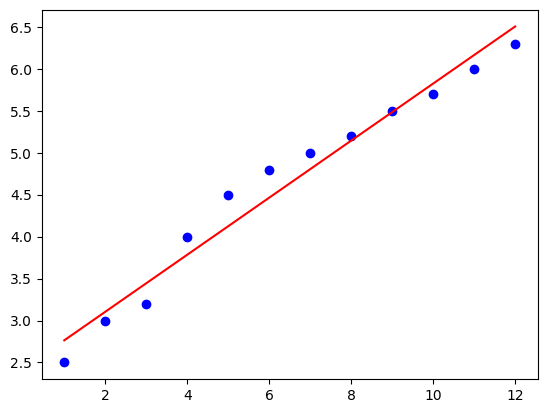

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 9. 결과 시각화
plt.scatter(months, sales, color='blue')  # 실제 매출
plt.plot(months, predicted_sales, color='red') # 선형 회귀 예측
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

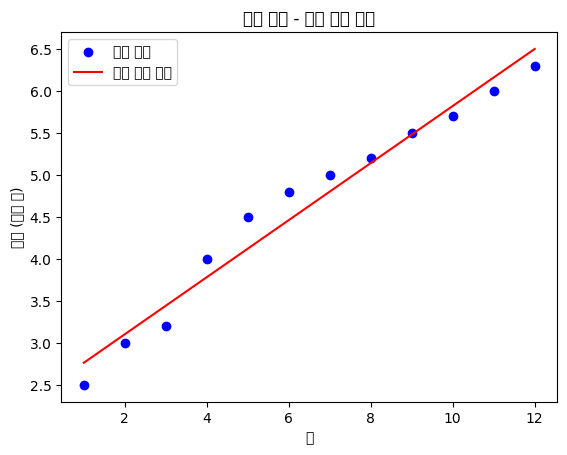

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 한글 설정
plt.rcParams['font.family'] ='Malgun Gothic'  # 맑은고딕
plt.rcParams['axes.unicode_minus'] =False   # 마이너스 깨짐 방지

plt.scatter(months, sales, color='blue', label='실제 매출')
plt.plot(months, predicted_sales, color='red', label='선형 회귀 예측')
plt.xlabel('월')
plt.ylabel('매출 (백만 원)')
plt.title('선형 회귀 - 월별 매출 예측')
plt.legend()
plt.show()